Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error: 0.2565
Absorption rate: 0.001022% per hour
R-squared: 0.9501
Estimated time to reach full capacity: 3719.55 days


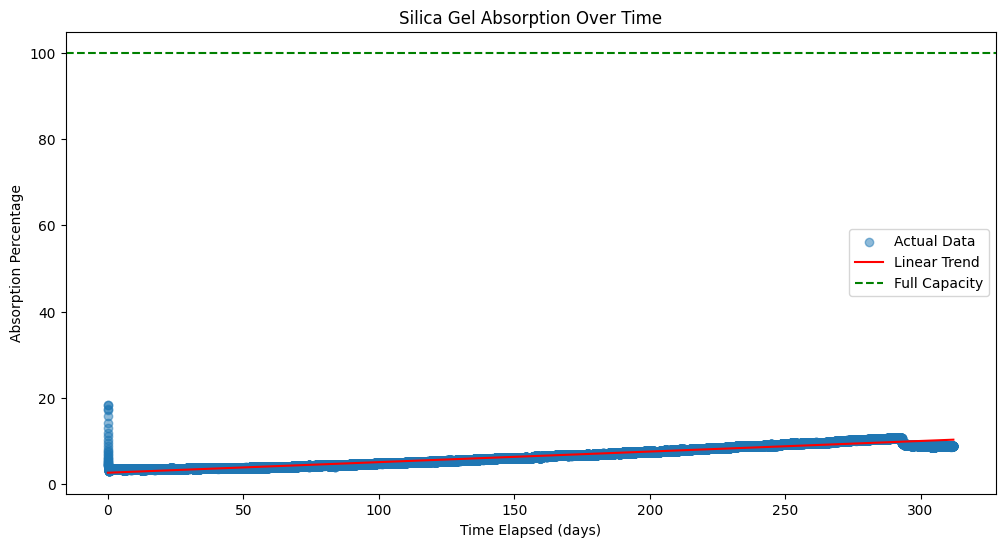


Initial absorption: 17.50%
Final absorption: 8.80%
Data collection period: 312.13 days
Number of data points: 44954

Temperature Statistics:
count    44954.000000
mean        21.131944
std          0.670316
min         20.610000
25%         20.960000
50%         20.990000
75%         21.030000
max         25.510000
Name: Temperature (°C), dtype: float64

Humidity Statistics:
count    44954.000000
mean         6.529025
std          2.266547
min          3.200000
25%          4.400000
50%          6.200000
75%          8.800000
max         18.500000
Name: Humidity (% RH), dtype: float64


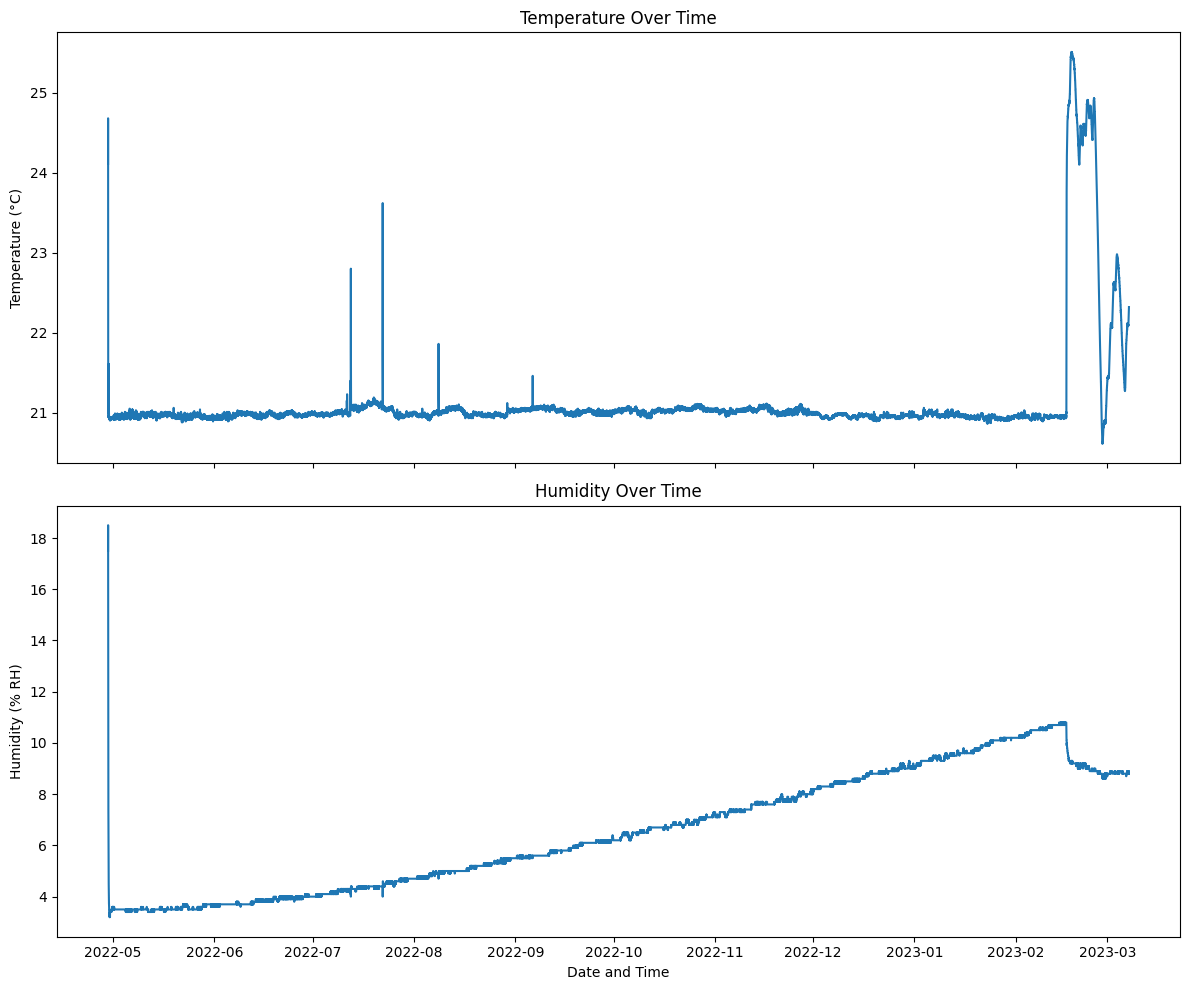

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics import mean_squared_error
# Mount Google Drive
drive.mount('/content/drive')

# Load the Excel file, skipping the first 6 rows
file_path = '/content/drive/MyDrive/Silica_GEL_Project/Raw data/Distribution of bags/Box_1 88gx1.xlsx'
data = pd.read_excel(file_path, skiprows=6)

# Use only the Date column for datetime information
data['Datetime'] = pd.to_datetime(data['Date'])

# Sort the data by datetime to ensure chronological order
data = data.sort_values('Datetime')

# Constants (replace with your actual values if different)
INITIAL_WEIGHT = 88  # grams
MAX_CAPACITY = 26.4  # grams of moisture that can be absorbed

# Estimate absorption based on humidity
data['estimated_absorption'] = data['Humidity (% RH)'] / 100 * MAX_CAPACITY
data['absorption_percentage'] = (data['estimated_absorption'] / MAX_CAPACITY) * 100

# Calculate time elapsed in hours
data['time_elapsed'] = (data['Datetime'] - data['Datetime'].min()).dt.total_seconds() / 3600

# Fit a linear regression to calculate the overall absorption rate
model = LinearRegression()
X = data[['time_elapsed']]
y = data['absorption_percentage']
model.fit(X, y)

absorption_rate = model.coef_[0]  # This is the slope of the line, representing % change per hour

# Calculate R-squared to check the fit
r_squared = model.score(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

print(f"Absorption rate: {absorption_rate:.6f}% per hour")
print(f"R-squared: {r_squared:.4f}")

# Estimate time to reach full capacity
if absorption_rate > 0:
    current_absorption = y.iloc[-1]
    remaining_absorption = 100 - current_absorption
    estimated_hours = remaining_absorption / absorption_rate
    estimated_days = estimated_hours / 24
    print(f"Estimated time to reach full capacity: {estimated_days:.2f} days")
else:
    print("Absorption rate is not positive. Cannot estimate time to full capacity.")

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(data['time_elapsed'] / 24, data['absorption_percentage'], label='Actual Data', alpha=0.5)
plt.plot(data['time_elapsed'] / 24, model.predict(X), color='red', label='Linear Trend')
plt.axhline(y=100, color='green', linestyle='--', label='Full Capacity')
plt.xlabel('Time Elapsed (days)')
plt.ylabel('Absorption Percentage')
plt.title('Silica Gel Absorption Over Time')
plt.legend()
plt.show()

# Print summary
print(f"\nInitial absorption: {y.iloc[0]:.2f}%")
print(f"Final absorption: {y.iloc[-1]:.2f}%")
print(f"Data collection period: {(data['Datetime'].max() - data['Datetime'].min()).total_seconds() / 86400:.2f} days")
print(f"Number of data points: {len(data)}")

# Additional analysis
print("\nTemperature Statistics:")
print(data['Temperature (°C)'].describe())

print("\nHumidity Statistics:")
print(data['Humidity (% RH)'].describe())

# Plot Temperature and Humidity over time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

ax1.plot(data['Datetime'], data['Temperature (°C)'])
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Temperature Over Time')

ax2.plot(data['Datetime'], data['Humidity (% RH)'])
ax2.set_ylabel('Humidity (% RH)')
ax2.set_title('Humidity Over Time')

plt.xlabel('Date and Time')
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processed: Box_12 44gx2.xlsx
Processed: Box_11 44gx2.xlsx
Processed: Box_10 88gx1.xlsx
Processed: Box_15 44gx2.xlsx
Processed: Box_18 44gx2.xlsx
Processed: Box_13 44gx2.xlsx
Processed: Box_14 44gx2.xlsx
Processed: Box_17 44gx2.xlsx
Processed: Box_16 44gx2.xlsx
Processed: Box_2 88gx1.xlsx
Processed: Box_20 44gx2.xlsx
Processed: Box_3 88gx1.xlsx
Processed: Box_4 88gx1.xlsx
Processed: Box_5 88gx1.xlsx
Processed: Box_9 88gx1.xlsx
Processed: Box_7 88gx1.xlsx
Processed: Box_6 88gx1.xlsx
Processed: Box_8 88gx1.xlsx
Processed: Box27_22g_4bags.xlsx
Processed: Box28_22g_4bags.xlsx
Processed: Box26_22g_4bags.xlsx
Processed: Box22_22g_4bags.xlsx
Processed: Box25_22g_4bags.xlsx
Processed: Box23_22g_4bags.xlsx
Processed: Box24_22g_4bags.xlsx
Processed: Box30_22g_4bags.xlsx
Processed: Box29_22g_4bags.xlsx
Processed: Box21_22g_4bags.xlsx
Error processing Box_19 44gx2.xlsx: '

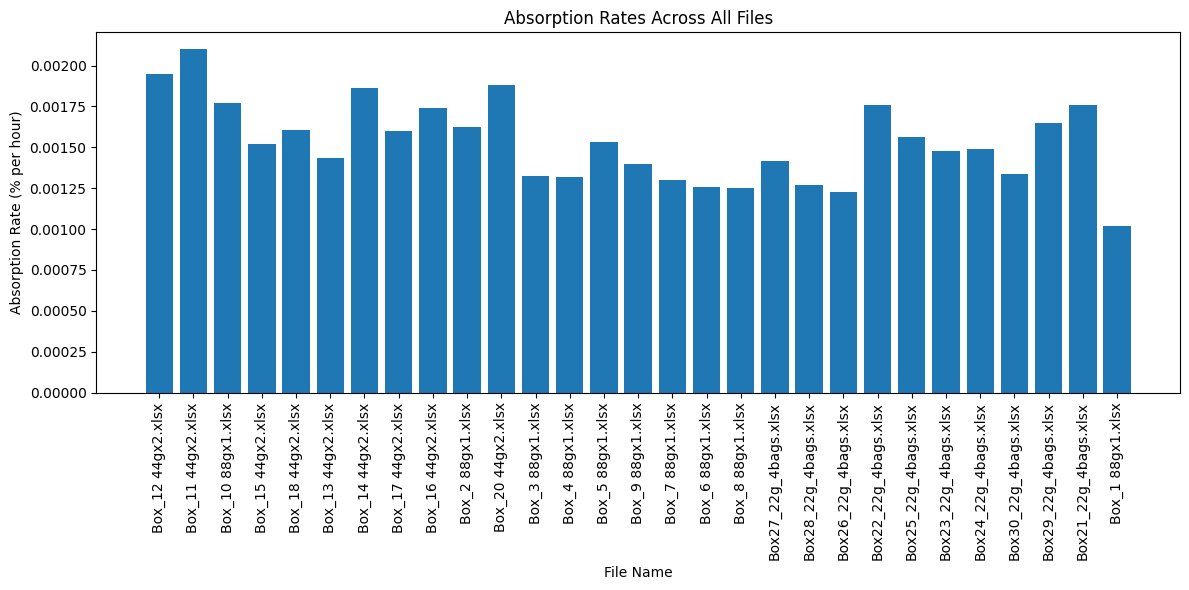


Time to Reach Full Capacity (days):
               file_name  time_to_full_capacity
0      Box_12 44gx2.xlsx            1845.302411
1      Box_11 44gx2.xlsx            1705.417448
2      Box_10 88gx1.xlsx            1999.311732
3      Box_15 44gx2.xlsx            2486.706509
4      Box_18 44gx2.xlsx            2307.203101
5      Box_13 44gx2.xlsx            2637.275295
6      Box_14 44gx2.xlsx            1965.143184
7      Box_17 44gx2.xlsx            2338.109459
8      Box_16 44gx2.xlsx            2140.178589
9       Box_2 88gx1.xlsx            2216.639183
10     Box_20 44gx2.xlsx            1947.049930
11      Box_3 88gx1.xlsx            2803.640258
12      Box_4 88gx1.xlsx            2758.735985
13      Box_5 88gx1.xlsx            2411.733571
14      Box_9 88gx1.xlsx            2600.821632
15      Box_7 88gx1.xlsx            2837.073301
16      Box_6 88gx1.xlsx            2894.569787
17      Box_8 88gx1.xlsx            3004.886595
18  Box27_22g_4bags.xlsx            2398.639037
19 

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Function to process a single file
def process_file(file_path):
    # Load the Excel file, skipping the first 6 rows
    data = pd.read_excel(file_path, skiprows=6)

    # Use only the Date column for datetime information
    data['Datetime'] = pd.to_datetime(data['Date'])

    # Sort the data by datetime to ensure chronological order
    data = data.sort_values('Datetime')

    # Constants (replace with your actual values if different)
    INITIAL_WEIGHT = 88  # grams
    MAX_CAPACITY = 26.4  # grams of moisture that can be absorbed

    # Estimate absorption based on humidity
    data['estimated_absorption'] = data['Humidity (% RH)'] / 100 * MAX_CAPACITY
    data['absorption_percentage'] = (data['estimated_absorption'] / MAX_CAPACITY) * 100

    # Calculate time elapsed in hours
    data['time_elapsed'] = (data['Datetime'] - data['Datetime'].min()).dt.total_seconds() / 3600

    # Fit a linear regression to calculate the overall absorption rate
    model = LinearRegression()
    X = data[['time_elapsed']]
    y = data['absorption_percentage']
    model.fit(X, y)

    absorption_rate = model.coef_[0]  # This is the slope of the line, representing % change per hour
    r_squared = model.score(X, y)

    # Calculate other metrics
    initial_absorption = y.iloc[0]
    final_absorption = y.iloc[-1]
    data_collection_period = (data['Datetime'].max() - data['Datetime'].min()).total_seconds() / 86400  # in days

    return {
        'file_name': os.path.basename(file_path),
        'absorption_rate': absorption_rate,
        'r_squared': r_squared,
        'initial_absorption': initial_absorption,
        'final_absorption': final_absorption,
        'data_collection_period': data_collection_period,
        'data_points': len(data),
        'avg_temperature': data['Temperature (°C)'].mean(),
        'avg_humidity': data['Humidity (% RH)'].mean()
    }

# Specify the folder path containing your Excel files
folder_path = '/content/drive/MyDrive/Silica_GEL_Project/Raw data/Distribution of bags'

# Get all Excel files in the folder
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# Process all files
results = []
for file in excel_files:
    file_path = os.path.join(folder_path, file)
    try:
        result = process_file(file_path)
        results.append(result)
        print(f"Processed: {file}")
    except Exception as e:
        print(f"Error processing {file}: {str(e)}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display summary statistics
print("\nSummary Statistics:")
print(results_df.describe())

# Plot absorption rates for all files
plt.figure(figsize=(12, 6))
plt.bar(results_df['file_name'], results_df['absorption_rate'])
plt.xticks(rotation=90)
plt.xlabel('File Name')
plt.ylabel('Absorption Rate (% per hour)')
plt.title('Absorption Rates Across All Files')
plt.tight_layout()
plt.show()

# Estimate time to reach full capacity for each file
MAX_CAPACITY = 100  # 100% absorption
results_df['time_to_full_capacity'] = (MAX_CAPACITY - results_df['final_absorption']) / results_df['absorption_rate'] / 24  # in days

print("\nTime to Reach Full Capacity (days):")
print(results_df[['file_name', 'time_to_full_capacity']])

# Save results to a CSV file
output_path = os.path.join(folder_path, 'absorption_analysis_results.csv')
results_df.to_csv(output_path, index=False)
print(f"\nResults saved to: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Results for category 88:
Absorption rate: 0.001381% per hour
R-squared: 0.7570
Mean Squared Error: 2.8632
Estimated time to reach full capacity: 2567.62 days


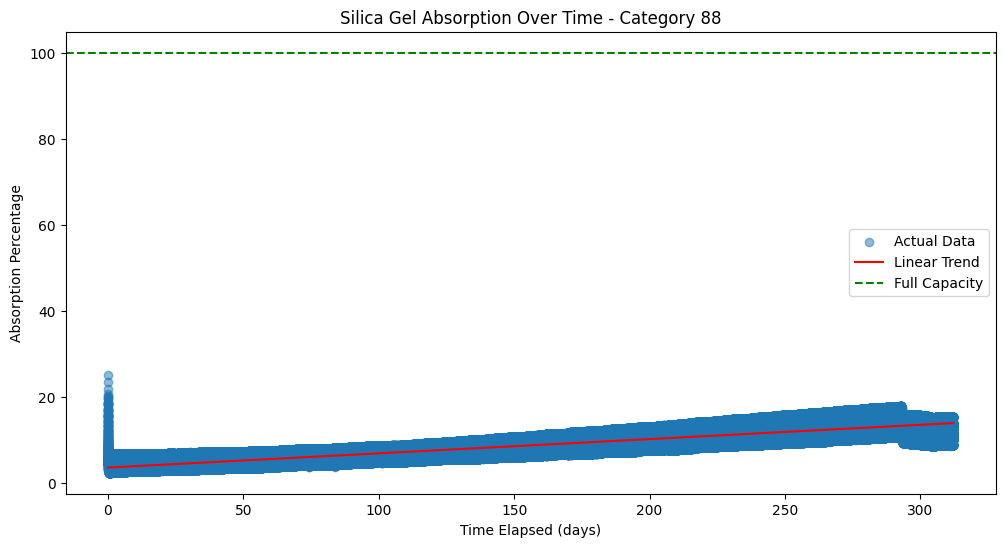


Initial absorption: 17.50%
Final absorption: 14.90%
Data collection period: 312.15 days
Number of data points: 449549

Temperature Statistics:
count    449549.000000
mean         21.004153
std           0.743448
min          19.390000
25%          20.370000
50%          21.090000
75%          21.210000
max          25.920000
Name: Temperature (°C), dtype: float64

Humidity Statistics:
count    449549.000000
mean          8.764769
std           3.432412
min           2.400000
25%           5.900000
50%           8.500000
75%          11.400000
max          25.000000
Name: Humidity (% RH), dtype: float64


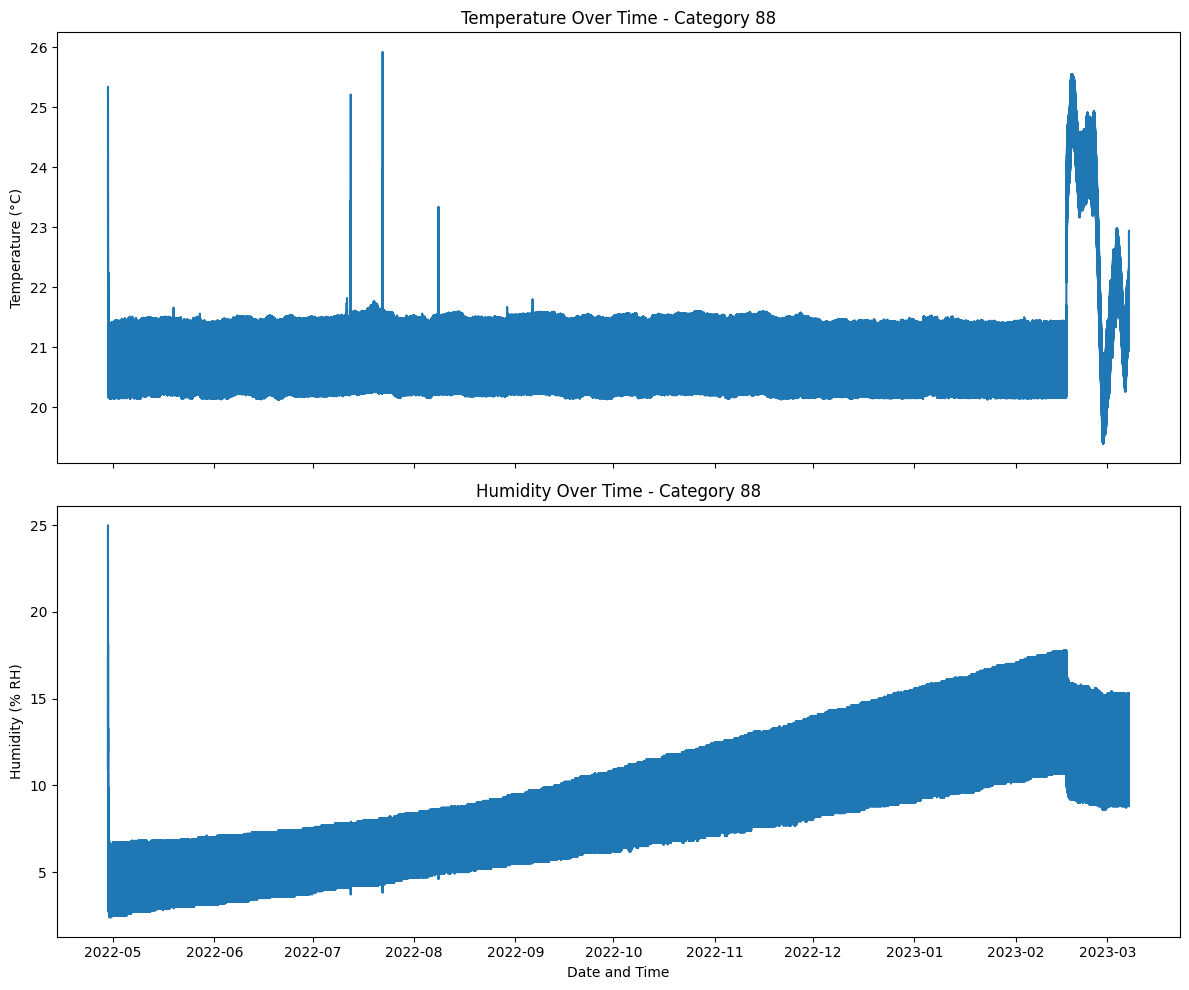


Results for category 44:
Absorption rate: 0.001744% per hour
R-squared: 0.8790
Mean Squared Error: 1.9585
Estimated time to reach full capacity: 2097.07 days


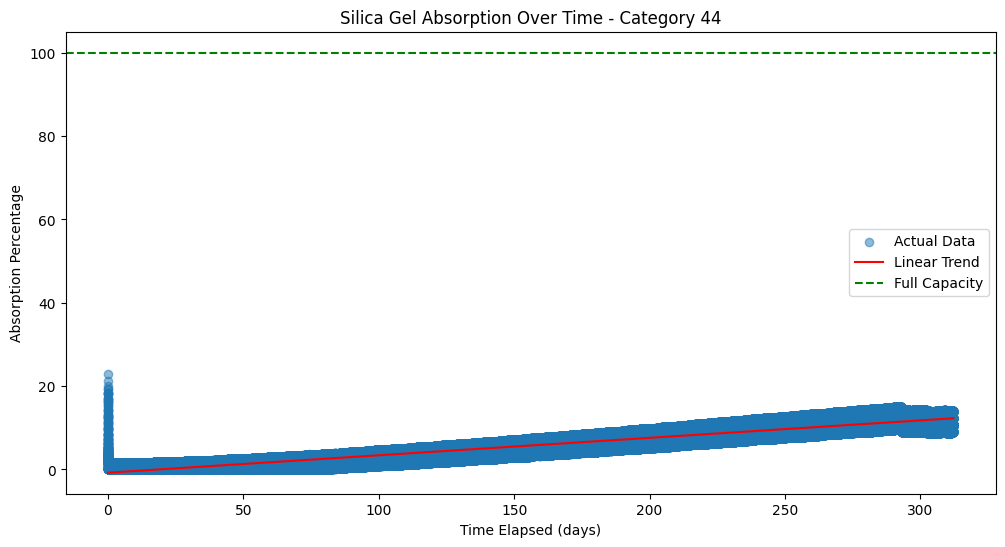


Initial absorption: 18.10%
Final absorption: 12.20%
Data collection period: 312.16 days
Number of data points: 404596

Temperature Statistics:
count    404596.000000
mean         21.113888
std           0.637896
min          18.680000
25%          20.770000
50%          21.160000
75%          21.240000
max          25.960000
Name: Temperature (°C), dtype: float64

Humidity Statistics:
count    404596.000000
mean          5.746953
std           4.023667
min           0.000000
25%           2.100000
50%           5.300000
75%           9.000000
max          22.900000
Name: Humidity (% RH), dtype: float64


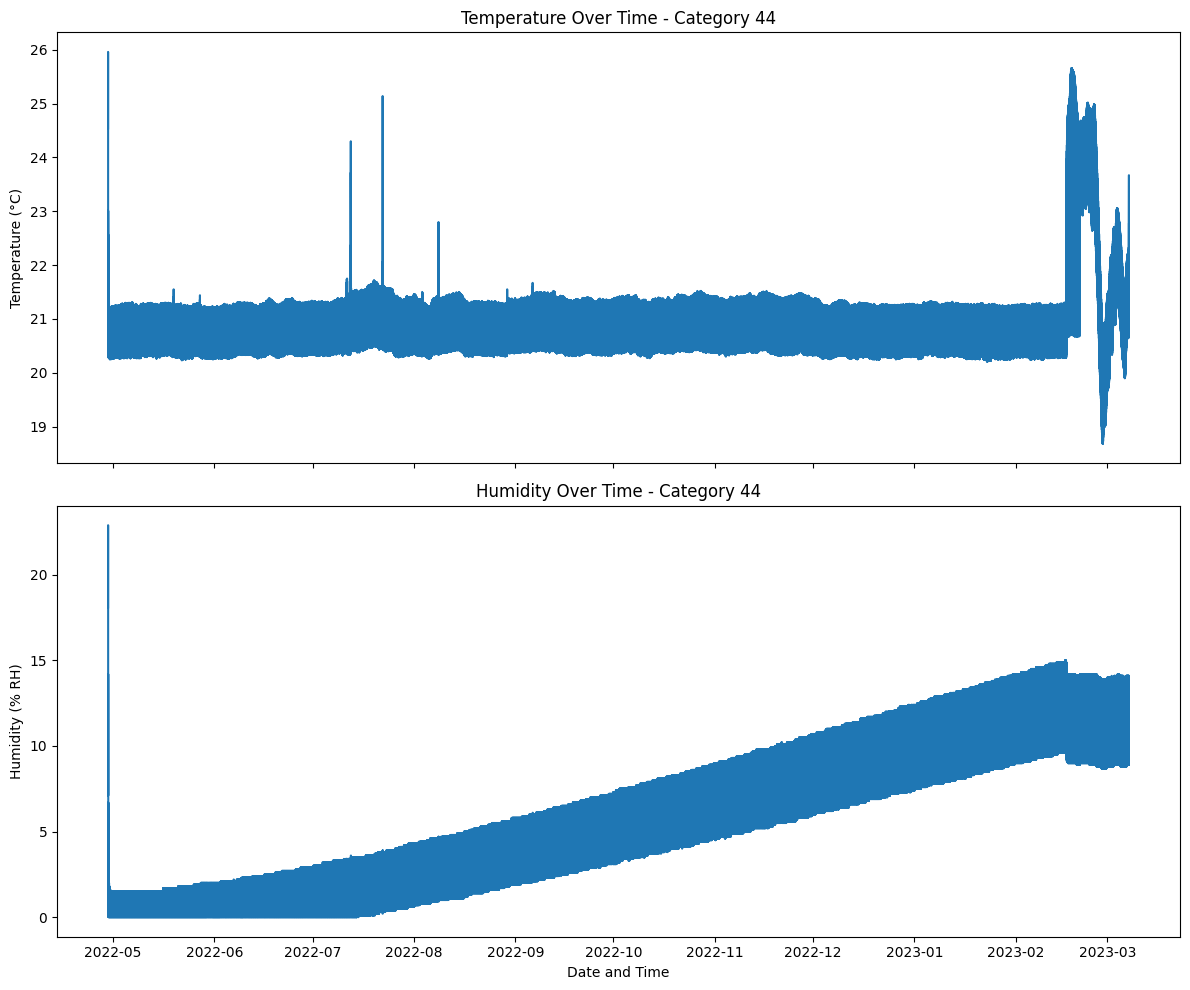


Results for category 22:
Absorption rate: 0.001495% per hour
R-squared: 0.8649
Mean Squared Error: 5.7545
Estimated time to reach full capacity: 2185.46 days


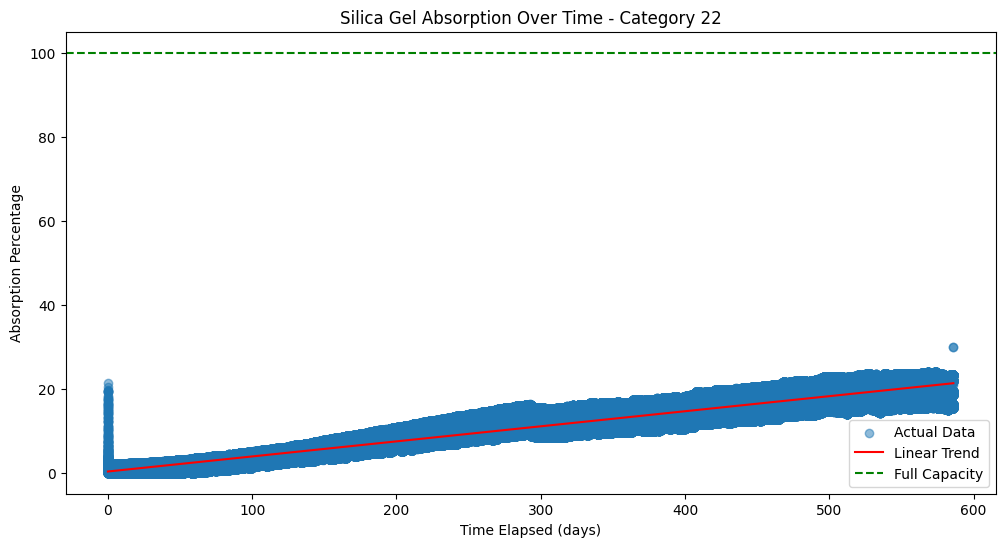


Initial absorption: 19.50%
Final absorption: 21.60%
Data collection period: 586.02 days
Number of data points: 843893

Temperature Statistics:
count    843893.000000
mean         23.137209
std           3.041639
min          14.940000
25%          21.160000
50%          21.370000
75%          25.080000
max          32.310000
Name: Temperature (°C), dtype: float64

Humidity Statistics:
count    843893.000000
mean         10.801381
std           6.525692
min           0.000000
25%           5.100000
50%          11.000000
75%          15.800000
max          30.000000
Name: Humidity (% RH), dtype: float64


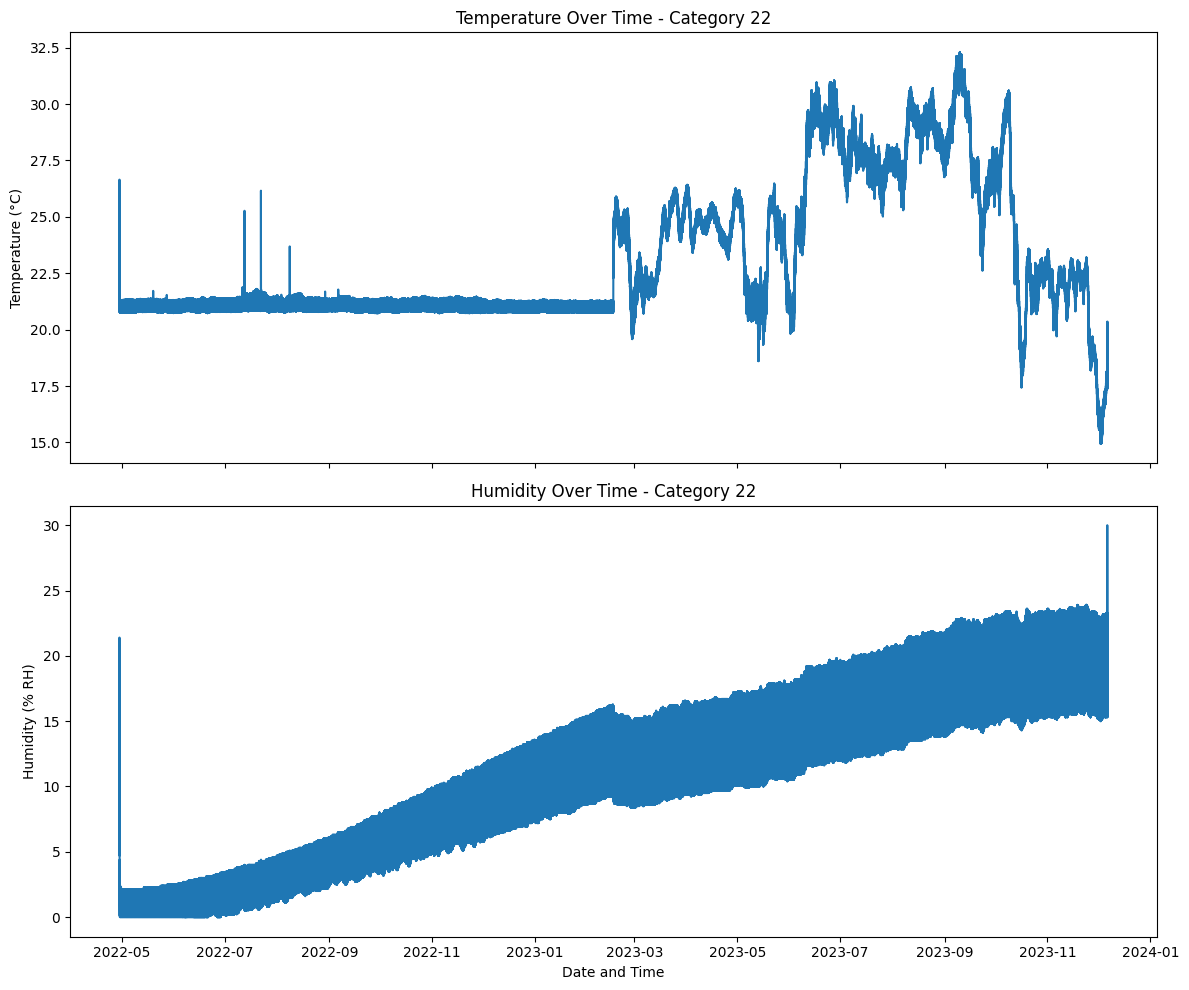

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

def process_category(category_files, category_name):
    all_data = []
    for file in category_files:
        data = pd.read_excel(file, skiprows=6)
        data['Datetime'] = pd.to_datetime(data['Date'])
        all_data.append(data)

    combined_data = pd.concat(all_data, ignore_index=True)
    combined_data = combined_data.sort_values('Datetime')

    # Constants (adjust these if needed)
    INITIAL_WEIGHT = int(category_name)  # using category name as initial weight
    MAX_CAPACITY = INITIAL_WEIGHT * 0.3  # assuming 30% of initial weight as max capacity

    combined_data['estimated_absorption'] = combined_data['Humidity (% RH)'] / 100 * MAX_CAPACITY
    combined_data['absorption_percentage'] = (combined_data['estimated_absorption'] / MAX_CAPACITY) * 100
    combined_data['time_elapsed'] = (combined_data['Datetime'] - combined_data['Datetime'].min()).dt.total_seconds() / 3600

    X = combined_data[['time_elapsed']]
    y = combined_data['absorption_percentage']

    model = LinearRegression()
    model.fit(X, y)

    absorption_rate = model.coef_[0]
    r_squared = model.score(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)

    print(f"\nResults for category {category_name}:")
    print(f"Absorption rate: {absorption_rate:.6f}% per hour")
    print(f"R-squared: {r_squared:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")

    if absorption_rate > 0:
        current_absorption = y.iloc[-1]
        remaining_absorption = 100 - current_absorption
        estimated_days = (remaining_absorption / absorption_rate) / 24
        print(f"Estimated time to reach full capacity: {estimated_days:.2f} days")
    else:
        print("Absorption rate is not positive. Cannot estimate time to full capacity.")

    plt.figure(figsize=(12, 6))
    plt.scatter(combined_data['time_elapsed'] / 24, combined_data['absorption_percentage'], label='Actual Data', alpha=0.5)
    plt.plot(combined_data['time_elapsed'] / 24, y_pred, color='red', label='Linear Trend')
    plt.axhline(y=100, color='green', linestyle='--', label='Full Capacity')
    plt.xlabel('Time Elapsed (days)')
    plt.ylabel('Absorption Percentage')
    plt.title(f'Silica Gel Absorption Over Time - Category {category_name}')
    plt.legend()
    plt.show()

    print(f"\nInitial absorption: {y.iloc[0]:.2f}%")
    print(f"Final absorption: {y.iloc[-1]:.2f}%")
    print(f"Data collection period: {(combined_data['Datetime'].max() - combined_data['Datetime'].min()).total_seconds() / 86400:.2f} days")
    print(f"Number of data points: {len(combined_data)}")

    print("\nTemperature Statistics:")
    print(combined_data['Temperature (°C)'].describe())

    print("\nHumidity Statistics:")
    print(combined_data['Humidity (% RH)'].describe())

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    ax1.plot(combined_data['Datetime'], combined_data['Temperature (°C)'])
    ax1.set_ylabel('Temperature (°C)')
    ax1.set_title(f'Temperature Over Time - Category {category_name}')

    ax2.plot(combined_data['Datetime'], combined_data['Humidity (% RH)'])
    ax2.set_ylabel('Humidity (% RH)')
    ax2.set_title(f'Humidity Over Time - Category {category_name}')

    plt.xlabel('Date and Time')
    plt.tight_layout()
    plt.show()

# Specify the folder path containing your Excel files
folder_path = '/content/drive/MyDrive/Silica_GEL_Project/Raw data/Distribution of bags/'

# Get all Excel files in the folder
excel_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# Categorize files
categories = {'88': [], '44': [], '22': []}
for file in excel_files:
    if '88' in file:
        categories['88'].append(file)
    elif '44' in file:
        categories['44'].append(file)
    elif '22' in file:
        categories['22'].append(file)

# Process each category
for category, files in categories.items():
    if files:
        process_category(files, category)
    else:
        print(f"No files found for category {category}")

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import drive
import os
import pickle

# Mount Google Drive
drive.mount('/content/drive')

def process_category(category_files, category_name):
    all_data = []
    for file in category_files:
        data = pd.read_excel(file, skiprows=6)
        data['Datetime'] = pd.to_datetime(data['Date'])
        all_data.append(data)

    combined_data = pd.concat(all_data, ignore_index=True)
    combined_data = combined_data.sort_values('Datetime')

    INITIAL_WEIGHT = int(category_name)
    MAX_CAPACITY = INITIAL_WEIGHT * 0.3

    combined_data['estimated_absorption'] = combined_data['Humidity (% RH)'] / 100 * MAX_CAPACITY
    combined_data['absorption_percentage'] = (combined_data['estimated_absorption'] / MAX_CAPACITY) * 100
    combined_data['time_elapsed'] = (combined_data['Datetime'] - combined_data['Datetime'].min()).dt.total_seconds() / 3600

    X = combined_data[['time_elapsed']]
    y = combined_data['absorption_percentage']

    model = LinearRegression()
    model.fit(X, y)

    absorption_rate = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)

    print(f"\nResults for category {category_name}:")
    print(f"Initial Weight: {INITIAL_WEIGHT}g")
    print(f"Absorption rate: {absorption_rate:.6f}% per hour")
    print(f"Intercept: {intercept:.6f}")
    print(f"R-squared: {r_squared:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")

    if absorption_rate > 0:
        current_absorption = y.iloc[-1]
        remaining_absorption = 100 - current_absorption
        estimated_days = (remaining_absorption / absorption_rate) / 24
        print(f"Estimated time to reach full capacity: {estimated_days:.2f} days")
    else:
        estimated_days = float('inf')
        print("Absorption rate is not positive. Cannot estimate time to full capacity.")

    mean_humidity = combined_data['Humidity (% RH)'].mean()

    return {
        'absorption_rate': absorption_rate,
        'intercept': intercept,
        'r_squared': r_squared,
        'mse': mse,
        'estimated_days': estimated_days,
        'mean_humidity': mean_humidity,
        'initial_absorption': y.iloc[0],
        'final_absorption': y.iloc[-1],
        'data_collection_period': (combined_data['Datetime'].max() - combined_data['Datetime'].min()).total_seconds() / 86400
    }

# Specify the folder path containing your Excel files
folder_path = '/content/drive/MyDrive/Silica_GEL_Project/Raw data/Distribution of bags/'

# Get all Excel files in the folder
excel_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# Categorize files
categories = {'88': [], '44': [], '22': []}
for file in excel_files:
    if '88' in file:
        categories['88'].append(file)
    elif '44' in file:
        categories['44'].append(file)
    elif '22' in file:
        categories['22'].append(file)

# Process each category and store results
results = {}
for category, files in categories.items():
    if files:
        results[category] = process_category(files, category)
    else:
        print(f"No files found for category {category}")

# Save results to a pickle file
with open('silica_gel_distribution_results.pkl', 'wb') as file:
    pickle.dump(results, file)

print("\nAll results have been saved to 'silica_gel_distribution_results.pkl'.")

# Print saved data for verification
print("\nSaved Data:")
for category, data in results.items():
    print(f"{category}:")
    for key, value in data.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.6f}")
        else:
            print(f"  {key}: {value}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Results for category 88:
Initial Weight: 88g
Absorption rate: 0.001381% per hour
Intercept: 3.591778
R-squared: 0.7570
Mean Squared Error: 2.8632
Estimated time to reach full capacity: 2567.62 days

Results for category 44:
Initial Weight: 44g
Absorption rate: 0.001744% per hour
Intercept: -0.787871
R-squared: 0.8790
Mean Squared Error: 1.9585
Estimated time to reach full capacity: 2097.07 days

Results for category 22:
Initial Weight: 22g
Absorption rate: 0.001495% per hour
Intercept: 0.289852
R-squared: 0.8649
Mean Squared Error: 5.7545
Estimated time to reach full capacity: 2185.46 days

All results have been saved to 'silica_gel_distribution_results.pkl'.

Saved Data:
88:
  absorption_rate: 0.001381
  intercept: 3.591778
  r_squared: 0.756973
  mse: 2.863202
  estimated_days: 2567.616075
  mean_humidity: 8.764769
  initial_absorption: 17.500000
  final_a

In [2]:
import pickle

# Load the results
with open('silica_gel_distribution_results.pkl', 'rb') as file:
    results = pickle.load(file)

def predict_duration(weight, numholes, brand, numbags, sizeholes):
    category = f"{weight}"
    if category not in results:
        return f"No data available for {weight}g"

    data = results[category]

    absorption_rate = data['absorption_rate']
    intercept = data['intercept']
    mean_humidity = data['mean_humidity']
    estimated_days = data['estimated_days']

    return estimated_days, mean_humidity, absorption_rate, intercept

# Example usage
inputs = [
    {"weight": 88, "numholes": 30, "brand": 1, "numbags": 1, "sizeholes": 1},
    {"weight": 44, "numholes": 30, "brand": 1, "numbags": 2, "sizeholes": 1},
    {"weight": 22, "numholes": 18, "brand": 1, "numbags": 1, "sizeholes": 1}
]

# Make predictions for each input
print("\nPredictions:")
for input_data in inputs:
    result = predict_duration(**input_data)
    if isinstance(result, str):
        print(result)
    else:
        estimated_days, mean_humidity, absorption_rate, intercept = result
        print(f"\nPrediction for {input_data['weight']}g:")
        print(f"Input parameters: {input_data}")
        print(f"Absorption rate: {absorption_rate:.6f}% per hour")
        print(f"Intercept: {intercept:.6f}")
        print(f"Predicted days to full capacity: {estimated_days:.2f}")
        print(f"Mean humidity used: {mean_humidity:.2f}%")

# Print loaded data for verification
print("\nLoaded Data:")
for category, data in results.items():
    print(f"{category}:")
    for key, value in data.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.6f}")
        else:
            print(f"  {key}: {value}")


Predictions:

Prediction for 88g:
Input parameters: {'weight': 88, 'numholes': 30, 'brand': 1, 'numbags': 1, 'sizeholes': 1}
Absorption rate: 0.001381% per hour
Intercept: 3.591778
Predicted days to full capacity: 2567.62
Mean humidity used: 8.76%

Prediction for 44g:
Input parameters: {'weight': 44, 'numholes': 30, 'brand': 1, 'numbags': 2, 'sizeholes': 1}
Absorption rate: 0.001744% per hour
Intercept: -0.787871
Predicted days to full capacity: 2097.07
Mean humidity used: 5.75%

Prediction for 22g:
Input parameters: {'weight': 22, 'numholes': 18, 'brand': 1, 'numbags': 1, 'sizeholes': 1}
Absorption rate: 0.001495% per hour
Intercept: 0.289852
Predicted days to full capacity: 2185.46
Mean humidity used: 10.80%

Loaded Data:
88:
  absorption_rate: 0.001381
  intercept: 3.591778
  r_squared: 0.756973
  mse: 2.863202
  estimated_days: 2567.616075
  mean_humidity: 8.764769
  initial_absorption: 17.500000
  final_absorption: 14.900000
  data_collection_period: 312.149688
44:
  absorption_r